# Characterization of Systems in the Spectral Domain

*This Jupyter notebook is part of a [collection of notebooks](../index.ipynb) in the bachelors module Signals and Systems, Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## The Transfer Function

Different time-domain measures can be used to characterize linear time-invariant (LTI) systems. For instance, the constant coefficients of ordinary partial differential equations (ODEs), the [impulse response](../systems_time_domain/impulse_response.ipynb) and the [step response](../systems_time_domain/step_response.ipynb). The [transfer function](../systems_time_domain/eigenfunctions.ipynb#Transfer-Function) denotes the complex factor $H(s)$ an eigenfunction $e^{s t}$ at the input of an LTI system is weighted with when passing through the system. Since the Laplace transform decomposes signals with respect to these eigenfunctions, the transfer function constitutes a measure in the spectral (Fourier or Laplace) domain. The links between the transfer function and the time-domain characterizations of LTI systems are discussed in this section.

### Relation to Impulse Response and In-/Output Signal

It was already outlined in the context of the [convolution theorem of the Fourier](../fourier_transform/theorems.ipynb#Convolution-Theorem) and [Laplace transform](../laplace_transform/theorems.ipynb#Convolution-Theorem), that an LTI system can be represented equivalently in the temporal and spectral domain

![LTI system in the temporal and spectral domain](LTI_system_time_spectral_domain.png)

In the temporal domain the output of an LTI system is given by the convolution of the input signal $x(t)$ with the [impulse response](../systems_time_domain/impulse_response.ipynb) $h(t)$

\begin{equation}
y(t) = x(t) * h(t)
\end{equation}

Using the convolution theorem of the Laplace transform yields

\begin{equation}
Y(s) = X(s) \cdot H(s)
\end{equation}

where $X(s) = \mathcal{L} \{ x(t) \}$ and $Y(s) = \mathcal{L} \{ y(t) \}$ are the Laplace transforms of the input and output signal, respectively. The transfer function $H(s)$ is given as the Laplace transform of the impulse response $h(t)$

\begin{equation}
H(s) = \mathcal{L} \{ h(t) \}
\end{equation}

This can be concluded from the [previously derived link between the impulse response and the transfer function](../systems_time_domain/eigenfunctions.ipynb#Link-between-Transfer-Function-and-Impulse-Response). It can furthermore be concluded that the transfer function is given as the quotient between output $Y(s)$ and input signal $X(s)$ in the Laplace domain

\begin{equation}
H(s) = \frac{Y(s)}{X(s)}
\end{equation}

for $X(s) \neq 0$. The same relations hold in the Fourier domain if the region of convergence (ROC) of the impulse response includes the imaginary axis $\Re \{ s \} = 0$. 

The derived results show that an LTI system can be fully characterized either in the temporal or spectral domain by its impulse response $h(t)$ or transfer function $H(s)$ or $H(j \omega)$, respectively. The transfer function can be derived by divison of the spectra of the output and input signal. This can be used to measure the transfer function of a system by specific input signals that fulfill $X(s) \neq 0$ with $X(s) \approx$ constant.

**Example**

The [transfer function $H(s)$ of the 2nd order low-pass filter](../systems_time_domain/network_analysis.ipynb#Transfer-Function) was derived as

\begin{equation}
H(s) = \frac{1}{C L s^2 + C R s + 1}
\end{equation}

According to above findings, the impulse response $h(t)$ of the low-pass is given by inverse Laplace transform of the transfer function $H(s)$. First the transfer function is defined in `SymPy`

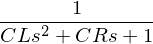

In [1]:
%matplotlib inline
import sympy as sym
sym.init_printing()

R, L, C = sym.symbols('R L C', positive=True)
s = sym.symbols('s', complex=True)

H = 1/(C*L*s**2 + C*R*s + 1)
H

Then the inverse Laplace transform is computed for the specific normalized values $L = .5$, $R = 1$, $C = .4$ of the network elements

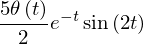

In [2]:
t = sym.symbols('t', real=True)
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

h = sym.inverse_laplace_transform(H.subs(RLC), s, t)
h

This result is plotted for illustration

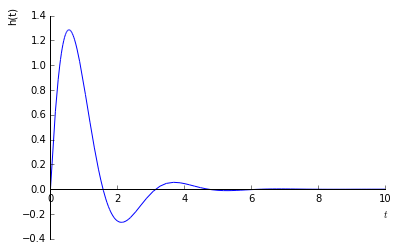

In [3]:
sym.plot(h, (t,0,10), xlabel='$t$', ylabel='h(t)');

The result is equal to the [impulse response derived by explicit solution of the underlying ODE](../systems_time_domain/network_analysis.ipynb#Impulse-Response).

### Relation to Differential Equations

Linear ODEs with constant coefficients describing the relation between input $x(t)$ and output $y(t)$ represent an LTI system. Such a system is characterized by the constants $\alpha_n$ and $\beta_m$ of the ODE

\begin{equation}
\sum_{n=0}^{N} \alpha_n \frac{d^n}{d t^n} y(t) = \sum_{m=0}^{M} \beta_m \frac{d^m}{d t^m} x(t)
\end{equation}

where $\alpha_N \neq 0$ with $N$ denoting the degree of the ODE. Initial values are discarded in the following. Applying a two-sided Laplace transform to the left- and right-hand-side and using the [differentiation theorem](../laplace_transform/theorems.ipynb#Differentiation-Theorem) yields

\begin{equation}
Y(s) \sum_{n=0}^{N} \alpha_n s^n = X(s) \sum_{m=0}^{M} \beta_m s^m
\end{equation}

Rearranging this result derives the transfer function $H(s)$ of the system as

\begin{equation}
H(s) = \frac{Y(s)}{X(s)} = \frac{\sum_{m=0}^{M} \beta_m s^m}{\sum_{n=0}^{N} \alpha_n s^n}
\end{equation}

The transfer function of an LTI system whose in- and output relation can be characterized by an ODE is given as rational function in $s$. The coefficients of its numerator and denominator polynomial are given by the coefficients $\beta_m$ and $\alpha_n$ of the ODE. The conversion between both representations of an LTI system is hence straightforward.

**Example**

The coefficients for the 2nd order low-pass filter can be determined [from its ODE](../systems_time_domain/network_analysis.ipynb#Differential-Equation) or from above transfer function as

\begin{align}
\beta_0 &= 1 & \alpha_0 &= 1 \\
& & \alpha_1 &= C R \\
& & \alpha_2 &= C L
\end{align}

From theses coefficients the transfer function $H(s)$ is constructed in `SymPy`

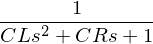

In [4]:
R, L, C = sym.symbols('R L C', positive=True)
beta = 1
alpha = L*C, R*C, 1

H = sym.Poly(beta, s) / sym.Poly(alpha, s)
H

Many software packages for signal processing feature functionality for the computation of the transfer function from the coefficients $\beta_m$ and $\alpha_n$ of the system. The Python Signal Processing Toolbox [`scipy.signal`](http://docs.scipy.org/doc/scipy/reference/signal.html) provides a function to numerically evaluate the transfer function $H(j \omega)$ for a given set of coefficients. This is illustrated in the following for the normalized values $R$, $L$ and $C$ given above.

In [5]:
from scipy import signal

R = 1
L = 0.5
C = 0.4
beta = 1
alpha = L*C, R*C, 1

w, H = signal.freqresp((beta, alpha))

This results in the vector `w` of angular frequencies $\omega$ and the vector `H` with the values of $H(j \omega)$ at these frequencies. The latter is plotted with the Python plotting library [`matplotlib`](http://matplotlib.org/).

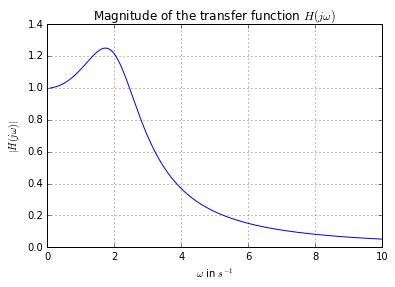

In [6]:
import matplotlib.pyplot as plt

plt.plot(w, abs(H))
plt.title('Magnitude of the transfer function $H(j \omega)$')
plt.xlabel('$\omega$ in $s^{-1}$')
plt.ylabel('$|H(j \omega)|$')
plt.grid();

### Determination from Internal Structure

The transfer function $H(s)$ can be determined from the internal structure of an LTI system, if known. Either by derivation of the ODE characterizing the system, as shown above, or by direct anlysis of the system in the Laplace/Fourier domain. For passive electrical networks this can be conducted by representing the signals and elements of the network by their complex impedances $Z(s)$ and applying Kirchhoff's circuit laws. This was illustrated for instance by the previous [Laplace domain analysis of a 2nd order low-pass filter](../laplace_transform/network_analysis.ipynb#Example:-Second-Order-Low-Pass-Filter). Similar procedures can be applied to other types of LTI systems, e.g. mechanical systems.

The transfer function is then given as the quotient bewtween the output signal $Y(s)$ and the input signal $X(s)$ in the transformed domain.

### Bode Plots

The Fourier domain transfer function $H(j \omega)$ characterizes the transmission properties of an LTI system with respect to the [harmonic exponential signal](../continuous_signals/standard_signals.ipynb#Complex-Exponential-Signal) $e^{j \omega}$ for the angular frequency $\omega = 2 \pi f$. In order to illustrate the characteristics of an LTI system, often the magnitude $| H(j \omega) |$ and phase $\varphi_H(j \omega)$ of the transfer function is regarded separately. Decomposing the output signal $Y(j \omega) = X(j \omega) \cdot H(j \omega)$ into its magnitude $| Y(j \omega) |$ and phase $\varphi_Y(j \omega)$ yields

\begin{align}
| Y(j \omega) | &= | X(j \omega) | \cdot | H(j \omega) | \\
\varphi_Y(j \omega) &= \varphi_X(j \omega) + \varphi_H(j \omega)
\end{align}

where $X(j \omega)$ denotes the input signal, and $| X(j \omega) |$ and $\varphi_X(j \omega)$ its magnitude and phase, respectively. It can be concluded from above equations, that the magnitude $| H(j \omega) |$ provides the frequency-dependent attenuation of the magnitude $| X(j \omega) |$ of the input signal by the system, while $\varphi_H(j \omega)$ provides the introduced phase-shift. 

A common graphical illustration of the sytem properties in terms of the magnitude and phase of the transfer function are [*bode plots*](https://en.wikipedia.org/wiki/Bode_plot). Here the logarithmic magnitude of the transfer function $20 \log_{10} | H(j \omega) |$ in [decibels](https://en.wikipedia.org/wiki/Decibel) is plotted against the logarithm of the frequency $\omega$ or $f$. The phase $\varphi_H(j \omega)$ is plotted linearly against the logarithm of the frequency. A transfer function $H(s)$ which is a rational function in $s$ can be represented [in terms of its poles and zeros](../laplace_transform/definition.ipynb#Representation). Applying this representation to the transfer function $H(j \omega)$ in the Fourier domain yields

\begin{equation}
H(j \omega) = K \cdot \frac{\prod_{\mu=0}^{Q} (j \omega - s_{0 \mu})}{\prod_{\nu=0}^{P} (j \omega - s_{\infty \nu})}
\end{equation}

where $s_{0 \mu}$ and $s_{\infty \nu}$ denote the $\mu$-th zero and $\nu$-th pole of $H(s)$, and $Q$ and $P$ the total number of zeros and poles, respectively. The logarithm of the magnitude and the phase can then be expressed as

\begin{align}
\log_{10} | H(j \omega) | &= \sum_{\mu=0}^{Q} \log_{10} |j \omega - s_{0 \mu}| - \sum_{\nu=0}^{P} \log_{10} |j \omega - s_{\infty \nu}| + \log_{10} |K|   \\
\varphi_H(j \omega) &= \sum_{\mu=0}^{Q} \arg (j \omega - s_{0 \mu}) - \sum_{\nu=0}^{P} \arg (j \omega - s_{\infty \nu})
\end{align}

where $\arg(\cdot)$ denotes the [argument](https://en.wikipedia.org/wiki/Argument_%28complex_analysis%29) (phase) of a complex function. It can be concluded from above result, that the individual contributions of the poles and zeros to the bode plot can be superimposed. This fact can be exploited to manually draw approximated bode plots illustrating the properties of an LTI system for a given set of poles and zeros. Rules for the asymptotic behavior of the magnitude and phase for single poles and zeros are available in the [literature](https://en.wikipedia.org/wiki/Bode_plot#Rules_for_handmade_Bode_plot). For instance it is stated that a single pole/zero results in a magnitude response in the bode plot that decreases/increases with a slope of 20 dB per decade. These rules provide insights into the influence of the location and order of poles and zeros on the properties of systems. They are of benefit when designing systems with given magnitude and phase properties.

**Example**

The bode plot of the 2nd order lowpass filter is plotted. The transfer function $H(j \omega)$ of the low-pass filter can be derived from its Laplace domain counterpart $H(s)$ by

\begin{equation}
H(j \omega) = \frac{1}{C L s^2 + C R s + 1} \bigg\rvert_{s = j \omega}
\end{equation}

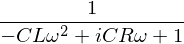

In [7]:
w = sym.symbols('omega', real=True)
R, L, C = sym.symbols('R L C', positive=True)
s = sym.I * w

H = 1/(C*L*s**2 + C*R*s + 1)
H

The bode plot is generated for the normalized values for $R$, $L$ and $C$ given above

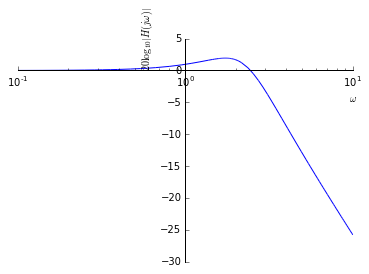

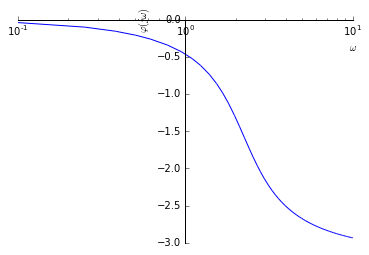

In [8]:
RLC = {R: 1, L: sym.Rational('.5'), C: sym.Rational('.4')}

sym.plot(20*sym.log(sym.Abs(H.subs(RLC)), 10), (w, 0.1, 10), xscale='log', xlabel='$\omega$', ylabel='$20 \log_{10} | H(j \omega) |$');
sym.plot(sym.arg(H.subs(RLC)), (w, 0.1, 10), xscale='log', xlabel='$\omega$', ylabel=r'$\varphi(j \omega)$');

**Example**

The bode plot of a second-order LTI system with the following transfer function

\begin{equation}
H(s) = \frac{(s - s_0)(s - s_0^*)}{(s - s_\infty)(s - s_\infty^*)}
\end{equation}

with 

\begin{align}
s_0 &= \sigma_0 + j \omega_0  &\text{with } \quad &\sigma_0 = 2000, \omega_0 = 2 \pi \cdot 100 \\
s_\infty  &= \sigma_\infty + j \omega_\infty & &\sigma_\infty = 20000, \omega_\infty = 2 \pi \cdot 4000
\end{align}

is constructed in this example. First the contribution of the zero $s_0$ to the magnitude of the transfer function $H(j \omega)$ is computed and plotted over the frequency $f$ using $\omega = 2 \pi f$.

In [9]:
def db(x):
    return 20 * sym.log(sym.Abs(x), 10)

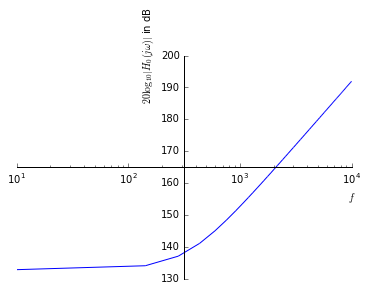

In [10]:
f = sym.symbols('f', real=True)
s = sym.I * 2*sym.pi*f
s_0 = 2000 + sym.I * 2*sym.pi*100

H1 = (s - s_0)*(s - sym.conjugate(s_0))
Hlog1 = db(H1)

sym.plot(Hlog1, (f, 10, 10000), xscale='log', xlabel='$f$', ylabel='$20 \log_{10} |H_0(j \omega)|$ in dB');

Now the contribution of the pole $s_\infty$ is computed and plotted

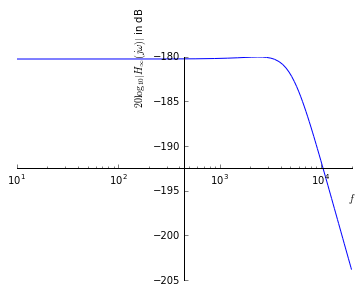

In [11]:
s_inf = 20000 + sym.I * 2*sym.pi*4000

H2 = 1/((s - s_inf)*(s - sym.conjugate(s_inf)))
Hlog2 = db(H2)
sym.plot(Hlog2, (f, 10, 20000), xscale='log', xlabel='$f$', ylabel='$20 \log_{10} |H_\infty(j \omega)|$ in dB');

The (logarithmic) magnitude frequency response of the system is given by superposition of the individual contributions from the zero and the pole

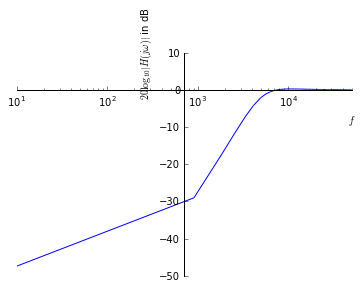

In [12]:
Hlog = Hlog1 + Hlog2
sym.plot(Hlog, (f, 10, 50000), xscale='log', xlabel='$f$', ylabel='$20 \log_{10} |H(j \omega)|$ in dB');

**Exercise**

* Examine the bode plots for the contributions of the zero and the pole:
    * What regions show approximately linear behavior over the frequency $f$? 
    * What is the slope of these regions per octave/decade? 
    * At which frequency is the transition between the regions of linear behavior? How is the frequency related to the imaginary part of the zero/pole?

* Examine the bode plot of the system. How is it related to the bode plots for its zero/pole?

* Move the pole and/or zero closer to the imaginary axis by changing the values $\sigma_\infty$ and/or $\sigma_0$. What changes?

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Lecture Notes on Signals and Systems* by Sascha Spors.